<div align="center">
    <h1>The Predictive Power of Movie Ratings</h1>
    <h4>Spring 2025 Data Science Project</h4>
    <h4>by Rehan Kabir, Jeffrey Joyal, Saharsh Maloo</h4>
</div>


# Contributions

### Rehan
I wrote the text and code for Hypothesis Tests 1 and 3. This includes coming up with what to test, coding all the data preprocessing, finding and implementing the right libraries for the right test, creating the visualizations for the resutls, and then iterpreting the results in the context of the problem. I also developed the third machine learning test by interpretting the results of the previous two regression predictions. I realized that adding categorizal contextualization could increase the predictive power of the movie ratings, so I implemented multi-hot encoding + top-n-element vectorization techniques so that the categorical data in genres and cast and could be represented numerically, and then I ran the enhanced featureset through a Random Forest Regression Model and interpreted my results.

### Jeffrey Joyal

I was responsible for the second hypothesis test, were I handled the data cleaning, formulating of the null/alternate hypothesis, and interpreting the results. I was testing whether movie_genres have a large impact on the average rating of the movie, using the ANOVA test. I displayed the results in a chart and interpreted the values of the test to determine that movie genre didn't have a significant impact on movie rating. I also built the first Linear Regression model that was used to predict movie ratings based on multiple features in the data set such as budget, popularity, revenue, and runtime. These features were selected because they are commonly associated with movie's financial success and ratings. I extracted the relevant features and trained a simple Linear Regression model, and interpreted the results from the model performance metrics. The inaccuracy of the linear model led us to a less linear random forest regressor in the next step.

### Saharsh Maloo
Write whatever you did, talk about doing the second random forest model.

# Introduction
#### This project investigates the factors that influence a movie’s average viewer rating (vote_average) and explores whether these features can be used to accurately predict audience sentiment. The central question is: Which measurable aspects of a movie, such as budget, revenue, runtime, genres, and cast, are associated with higher ratings, and can a predictive model leverage them effectively? To begin, we conducted hypothesis tests to evaluate whether individual features like budget, popularity, and runtime had statistically significant effects on ratings. Interestingly, these tests suggested that no single feature had a strong standalone impact. However, this led to a deeper exploration of whether combining multiple features, especially with categorical data like genre and cast, could improve predictive power. This question is important because it blends statistical insight with real-world decision-making in the film industry, offering practical implications for content creators, marketers, and platforms seeking to optimize viewer satisfaction.

# Descriptive Statistics for Budget, Range and Ratings

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns

In [162]:
movies_df = df = pd.read_csv('moviesdata/movies_metadata.csv')
ratings_df = pd.read_csv('moviesdata/ratings.csv')


/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_45070/2287946601.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = df = pd.read_csv('moviesdata/movies_metadata.csv')


In [163]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [164]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


In [165]:
movies_df.columns

Index(['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [166]:
# Descriptive stats for key numeric columns
movies_df[['budget', 'revenue', 'runtime', 'popularity', 'vote_average', 'vote_count']].describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [167]:
#convert columns to numeric, coercing errors
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
movies_df['revenue'] = pd.to_numeric(movies_df['revenue'], errors='coerce')
#drop rows where conversion failed (NaNs)
movies_df = movies_df.dropna(subset=['budget', 'revenue'])
#now filter the clean rows
movies_clean = movies_df[(movies_df['budget'] > 0) & (movies_df['revenue'] > 0)]

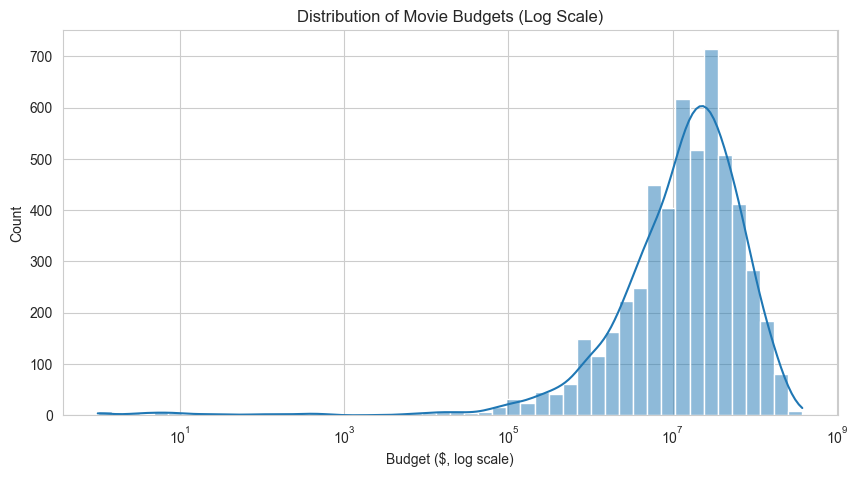

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(movies_clean['budget'], bins=50, kde=True, log_scale=True)
plt.title('Distribution of Movie Budgets (Log Scale)')
plt.xlabel('Budget ($, log scale)')
plt.show()

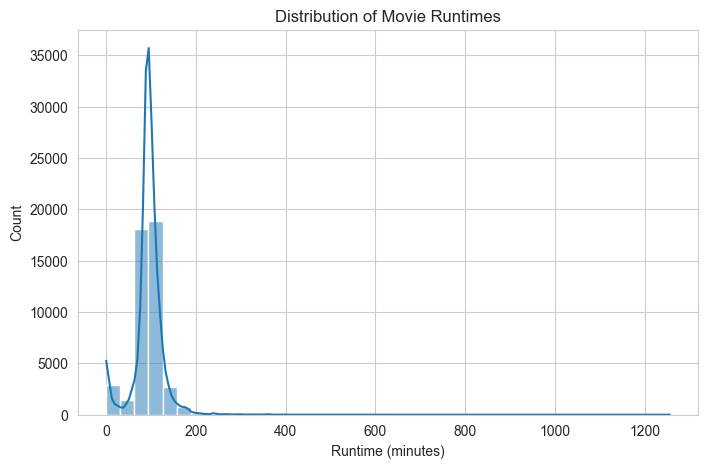

In [169]:
plt.figure(figsize=(8, 5))
sns.histplot(movies_df['runtime'].dropna(), bins=40, kde=True)
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (minutes)')
plt.show()


## Conclusion: Descriptive Statistics

The dataset contains over 45,000 movies, with key numeric features like budget, revenue, runtime, vote average, and vote count. Most movies have a runtime between 85 and 107 minutes, clustering around the 90–100 minute mark. Budgets and revenues are heavily right-skewed, with many zero values and a few extremely high outliers — necessitating the use of a log scale for visualization. The average budget is around $4.2 million, while the average revenue is roughly $11 million, although both have medians of zero, suggesting missing or unreported data for many entries. The vote average typically ranges between 5 and 7, while the number of votes varies widely, indicating differing popularity levels among the movies.

# Data Cleaning for Hypothesis Test 1

#### Pearson correlation test: This tested whether there was a correlation between a movie's budget and it's average movie rating.

In [170]:
print("Budget Type:", movies_df['budget'].dtype)
movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
print("Budget Type:", movies_df['budget'].dtype)
print("Id Type:", movies_df['id'].dtype)
movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')
print("Id Type:", movies_df['id'].dtype)
movies_df = movies_df[movies_df['id'].notna()] # remove NaNs
movies_df = movies_df[movies_df['id'] != float('inf')] # remove infinities if any
movies_df['id'] = movies_df['id'].astype('int64')
print("Id Type:", movies_df['id'].dtype)

Budget Type: float64
Budget Type: float64
Id Type: object
Id Type: int64
Id Type: int64


/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_45070/310730754.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['budget'] = pd.to_numeric(movies_df['budget'], errors='coerce')
/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_45070/310730754.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['id'] = pd.to_numeric(movies_df['id'], errors='coerce')


In [171]:
movies_df['budget'].describe()

count    4.546000e+04
mean     4.224858e+06
std      1.742467e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [172]:
budgets_df = movies_df[['id', 'budget']].reset_index(drop=True)
budgets_df

,id,budget
0,862,30000000.0
1,8844,65000000.0
2,15602,0.0
3,31357,16000000.0
4,11862,0.0
...,...,...
45455,439050,0.0
45456,111109,0.0
45457,67758,0.0
45458,227506,0.0


In [173]:
# Remove rows where budget is 0
budgets_df = budgets_df[budgets_df['budget'] != 0]
# Sort by id in ascending order
budgets_df = budgets_df.sort_values(by='id').reset_index(drop=True)
budgets_df

,id,budget
0,5,4000000.0
1,11,11000000.0
2,12,94000000.0
3,13,55000000.0
4,14,15000000.0
...,...,...
8885,452068,4000000.0
8886,455043,25000000.0
8887,457307,7200.0
8888,460846,15000000.0


Cleaned Budget Stats:
 count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64


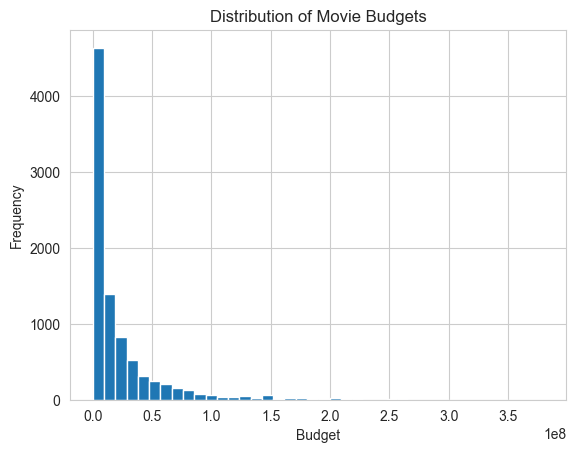

In [174]:
print("Cleaned Budget Stats:\n", budgets_df['budget'].describe())
budgets_df['budget'].hist(bins=40)
plt.title('Distribution of Movie Budgets')
plt.xlabel('Budget')
plt.ylabel('Frequency')
plt.show()

In [175]:
print("ID Type:", ratings_df['movieId'].dtype)
print("Rating Type:", ratings_df['rating'].dtype)
print("Rating Stats:\n", ratings_df['rating'].describe())

ID Type: int64
Rating Type: float64
Rating Stats:
 count    2.602429e+07
mean     3.528090e+00
std      1.065443e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64


In [176]:
avgrating_df = ratings_df.groupby('movieId')['rating'].mean().reset_index()
avgrating_df.columns = ['id', 'avg_rating']
avgrating_df

,id,avg_rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [177]:
merged_df = budgets_df.merge(avgrating_df, on='id', how='inner')
merged_df = merged_df.dropna().reset_index(drop=True)
merged_df

,id,budget,avg_rating
0,5,4000000.0,3.079565
1,11,11000000.0,3.660591
2,12,94000000.0,2.672179
3,13,55000000.0,3.326442
4,14,15000000.0,3.430807
...,...,...,...
2120,173689,75000.0,1.500000
2121,173865,3120375.0,3.750000
2122,173897,40000000.0,4.000000
2123,174751,25000000.0,2.500000


## Hypothesis Test 1: Is there a correlation between a movie's budget and its average rating?

Pearson correlation coefficient: -0.02035508282807372
P-value: 0.3483122431419324


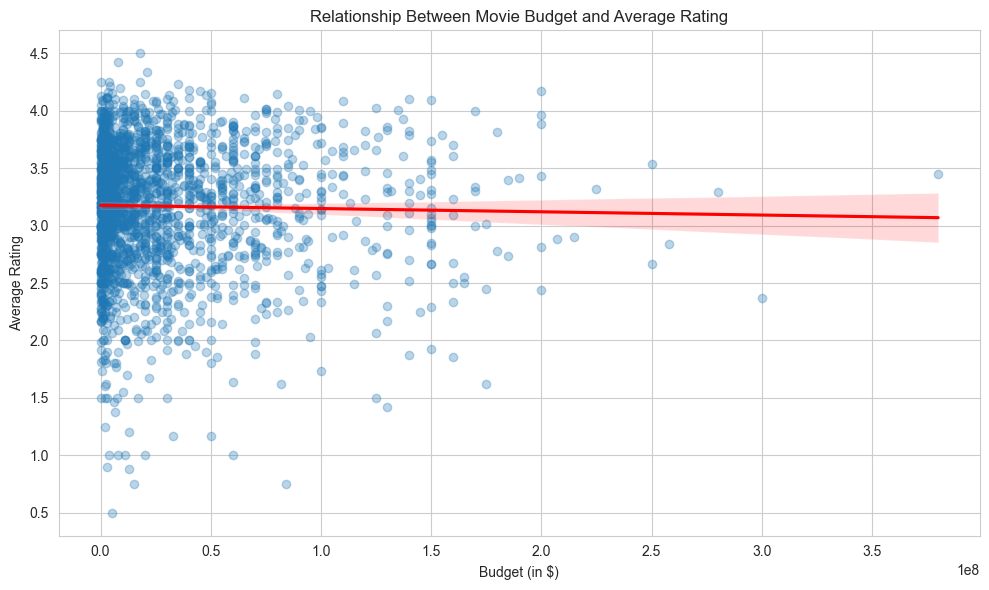

In [178]:
# Calculate Pearson correlation and p-value
corr, p_value = pearsonr(merged_df['budget'], merged_df['avg_rating'])

print(f"Pearson correlation coefficient: {corr}")
print(f"P-value: {p_value}")

plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='budget', y='avg_rating', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})

plt.title('Relationship Between Movie Budget and Average Rating')
plt.xlabel('Budget (in $)')
plt.ylabel('Average Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion for Hypothesis Test 1

### Since p = 0.35 > .05, there is little to no correlation between a movie's budget and its average rating. 

# Data Cleaning for Hypothesis Test 2

#### ANOVA: The second test will be seeing if there is a significant difference between the average rating of different genres of movies. For this we need to get the genre, id, and avg rating for every movie in one df.

In [179]:
print(movies_df.info())
movies_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 45460 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45460 non-null  object 
 1   belongs_to_collection  4490 non-null   object 
 2   budget                 45460 non-null  float64
 3   genres                 45460 non-null  object 
 4   homepage               7778 non-null   object 
 5   id                     45460 non-null  int64  
 6   imdb_id                45443 non-null  object 
 7   original_language      45449 non-null  object 
 8   original_title         45460 non-null  object 
 9   overview               44506 non-null  object 
 10  popularity             45460 non-null  object 
 11  poster_path            45077 non-null  object 
 12  production_companies   45460 non-null  object 
 13  production_countries   45460 non-null  object 
 14  release_date           45376 non-null  object 
 15  revenue

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0.0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [180]:
import ast

print(movies_df['genres'].info())
print(movies_df['genres'].head())

# convert the string representation of lists to actual lists
movies_df['genres'] = movies_df['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


# extract movie id and the corresponding genres for each movie
movie_genres = []
for index, row in movies_df.iterrows():
    movie_id = row['id']
    for genre in row['genres']:
        # print(genre)
        movie_genres.append({'id': movie_id, 'genre': genre['name']})

# create a DataFrame from the list of dictionaries of movie genres
movie_genre_df = pd.DataFrame(movie_genres)
# display the first few rows of the DataFrame
movie_genre_df

<class 'pandas.core.series.Series'>
Index: 45460 entries, 0 to 45465
Series name: genres
Non-Null Count  Dtype 
--------------  ----- 
45460 non-null  object
dtypes: object(1)
memory usage: 710.3+ KB
None
0    [{'id': 16, 'name': 'Animation'}, {'id': 35, '...
1    [{'id': 12, 'name': 'Adventure'}, {'id': 14, '...
2    [{'id': 10749, 'name': 'Romance'}, {'id': 35, ...
3    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
4                       [{'id': 35, 'name': 'Comedy'}]
Name: genres, dtype: object


,id,genre
0,862,Animation
1,862,Comedy
2,862,Family
3,8844,Adventure
4,8844,Fantasy
...,...,...
91080,439050,Family
91081,111109,Drama
91082,67758,Action
91083,67758,Drama


In [181]:
avgrating_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45115 entries, 0 to 45114
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          45115 non-null  int64  
 1   avg_rating  45115 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 705.1 KB


## Hypothesis Test 2: Is there a correlation between movie genre and average rating?


### H0: There is no significant difference in movie ratings across genres
### HA: There is a significant difference in movie ratings across genres.

ANOVA F-statistic: 0.9378028944035437
ANOVA p-value: 0.534638223731938


/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_45070/3400746446.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_df, x='genre', y='avg_rating', palette="Set2")


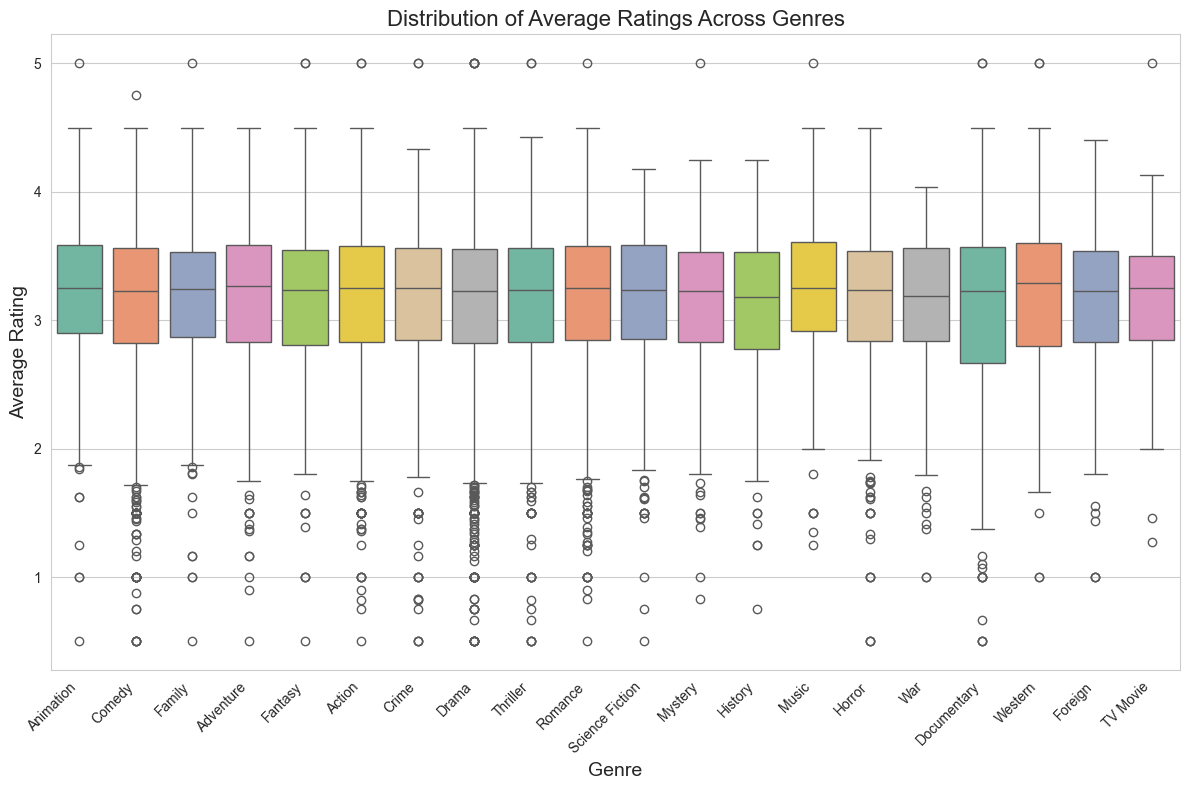

In [182]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# merge the movie_genre_df with the avgrating_df on Movie_ID
merged_df = pd.merge(movie_genre_df, avgrating_df, on='id', how='inner')
# merged_df

# group by 'Genre' and aggregate ratings into separate lists for each genre
ratings_by_genre = [merged_df[merged_df['genre'] == genre]['avg_rating'] for genre in merged_df['genre'].unique()]
# ratings_by_genre 

# calculate the ANOVA F-statistic and p-value
f_stat, p_value = stats.f_oneway(*ratings_by_genre)

print(f"ANOVA F-statistic: {f_stat}")
print(f"ANOVA p-value: {p_value}")

# create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(data=merged_df, x='genre', y='avg_rating', palette="Set2")

plt.title('Distribution of Average Ratings Across Genres', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Average Rating', fontsize=14)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## Conclusion for Hypothesis Test 2:

#### Since p = 0.535 > 0.05, we fail to reject the null hypothesis, and there is not a significant difference in movie ratings across genres. This means that specific genres dont necessarily indicate higher ratings, as can be seen in the box plot of ratings based on genres above.

# Data Clearning for Hypothesis Test 3

#### Independent Samples T‑Test: This checks whether there is a statistically significant difference in average rating for short runtime movies versus long runtime movies.

In [183]:
runtimes_df = movies_df[['id', 'runtime']].reset_index(drop=True)
runtimes_df = runtimes_df.dropna().reset_index(drop=True)
print(runtimes_df['id'].dtype)
print(runtimes_df['runtime'].dtype)
runtimes_df

int64
float64


,id,runtime
0,862,81.0
1,8844,104.0
2,15602,101.0
3,31357,127.0
4,11862,106.0
...,...,...
45198,439050,90.0
45199,111109,360.0
45200,67758,90.0
45201,227506,87.0


In [184]:
avgrating_df

,id,avg_rating
0,1,3.888157
1,2,3.236953
2,3,3.175550
3,4,2.875713
4,5,3.079565
...,...,...
45110,176267,4.000000
45111,176269,3.500000
45112,176271,5.000000
45113,176273,1.000000


In [185]:
merged_runtime_rating_df = runtimes_df.merge(avgrating_df, on='id', how='inner')
merged_runtime_rating_df = merged_runtime_rating_df.dropna().reset_index(drop=True)
merged_runtime_rating_df


,id,runtime,avg_rating
0,862,81.0,3.598930
1,8844,104.0,3.760163
2,949,170.0,3.905544
3,710,130.0,2.740334
4,1408,119.0,3.710181
...,...,...,...
7545,98604,91.0,3.795053
7546,5589,73.0,3.126140
7547,45527,92.0,2.791667
7548,49280,1.0,3.390625


In [186]:
median_runtime = merged_runtime_rating_df['runtime'].median()
print("Median runtime:", median_runtime)

Median runtime: 97.0


In [187]:
#create a new column to categorize movies as "short" or "long"
merged_runtime_rating_df['runtime_category'] = np.where(merged_runtime_rating_df['runtime'] <= median_runtime, 'short', 'long')
#split avg_rating into two groups based on runtime_category
short_ratings = merged_runtime_rating_df.loc[merged_runtime_rating_df['runtime_category'] == 'short', 'avg_rating']
long_ratings = merged_runtime_rating_df.loc[merged_runtime_rating_df['runtime_category'] == 'long', 'avg_rating']

## Hypothesis Test 3: Is there a statistically significant difference in average rating for short runtime movies versus long runtime movies?

### H0: There is no significant difference in average movie ratings for short versus long runtime movies.
### HA: There is a significant difference in average movie ratings for short versus long runtime movies.

In [188]:
t_stat, p_value = stats.ttest_ind(short_ratings, long_ratings, equal_var=False)
print("Welch's t-test results:")
print("T-statistic:", t_stat)
print("P-value:", p_value)

Welch's t-test results:
T-statistic: -2.514249130296376
P-value: 0.011949330505462579


/var/folders/qk/32gcb2693kb2vvhwyf7jmtn40000gn/T/ipykernel_45070/1108731645.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='runtime_category', y='avg_rating', data=df_plot, palette="Set2")


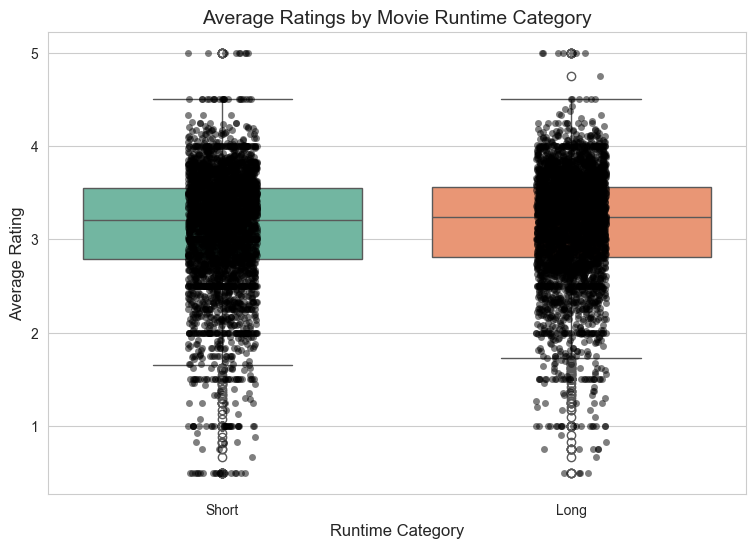

In [189]:
df_plot = merged_runtime_rating_df.copy()
#drop rows where runtime or avg_rating is missing
df_plot.dropna(subset=['runtime', 'avg_rating'], inplace=True)
#calculate the median runtime and categorize movies
median_runtime = df_plot['runtime'].median()
df_plot['runtime_category'] = np.where(df_plot['runtime'] <= median_runtime, 'Short', 'Long')
#set a style for Seaborn
sns.set_style("whitegrid")
#create the figure
plt.figure(figsize=(9, 6))
#draw a boxplot
sns.boxplot(x='runtime_category', y='avg_rating', data=df_plot, palette="Set2")
#overlay the raw data points (stripplot) to show the distribution more clearly
sns.stripplot(x='runtime_category', y='avg_rating', data=df_plot, color='black', alpha=0.5)
#add title and labels
plt.title("Average Ratings by Movie Runtime Category", fontsize=14)
plt.xlabel("Runtime Category", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.show()

## Conclusion for Hypothesis Test 3:

### Since p = 0.012 < .05, we fail to reject the null hypothesis. This means that there is no statistically significant difference in average ratings for short runtime movies versus long runtime movies.

# Anlyzing the Prediction Power that Budget, Popularity, Revenue, and Runtime have on the Average Movie Rating

In [190]:
feature_df = movies_df[['id', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average']].copy()
feature_df['popularity'] = pd.to_numeric(feature_df['popularity'], errors='coerce')
print(feature_df.dtypes)

id                int64
budget          float64
popularity      float64
revenue         float64
runtime         float64
vote_average    float64
dtype: object


In [191]:
feature_df = feature_df.dropna()
feature_df = feature_df[(feature_df['budget'] != '0') & (feature_df['revenue'] != 0)]
feature_df = feature_df.dropna(subset=['runtime'])
print(feature_df.isnull().sum())

id              0
budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
dtype: int64


In [192]:
feature_df.shape

(7402, 6)

## Interpretability Results with Linear Regression ~ what affects ratings?

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, root_mean_squared_error

#separate features and target
X = feature_df[['budget', 'popularity', 'revenue', 'runtime']]
y = feature_df['vote_average']

#split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

#predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print(f'R² score: {r2:.4f}')
print(f'RMSE: {rmse:.4f}')

R² score: 0.1081
RMSE: 0.9928


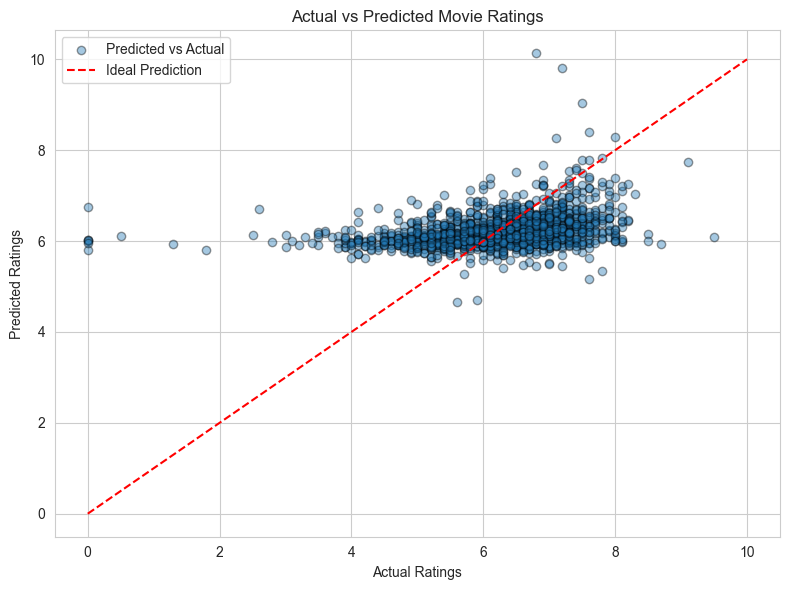

In [194]:
plt.figure(figsize=(8, 6))

# Scatter: actual vs predicted
plt.scatter(y_test, y_pred, alpha=0.4, edgecolor='k', label='Predicted vs Actual')

# Ideal line: y = x
plt.plot([0, 10], [0, 10], color='red', linestyle='--', label='Ideal Prediction')

plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Movie Ratings')

plt.grid(True)
plt.legend(loc='upper left')  # Add the legend here
plt.tight_layout()
plt.show()


In [195]:
#print model coefficients
coefficients = pd.Series(model.coef_, index=X.columns)
intercept = model.intercept_

print("Intercept (β₀):", intercept)
print("\nCoefficients:")
print(coefficients)


Intercept (β₀): 4.669736558142687

Coefficients:
budget       -6.269993e-09
popularity    9.933082e-03
revenue       1.422386e-09
runtime       1.405350e-02
dtype: float64


### Conclusion with Linear Regression
##### The regression model achieved an R² score of 0.108, meaning it explains about 11% of the variation in movie ratings using features like budget, popularity, revenue, and runtime. The RMSE of 0.993 indicates the model's average prediction is about one point off on a 10-point scale. These results reinforce our earlier findings with the hypothesis tests: these production metrics have limited power in predicting audience ratings. Runtime and popularity have the most influence among the selected features, though the effect sizes are still small. Budget and revenue have minimal to no practical impact on predicted ratings, aligning with previous statistical tests that found weak or no correlation between these variables and audience ratings.

## To explore potential nonlinear effects, we also tested a Random Forest Regressor

In [196]:
from sklearn.ensemble import RandomForestRegressor

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

print(f"🔍 Random Forest R² Score: {r2_rf:.4f}")
print(f"🔍 Random Forest RMSE: {rmse_rf:.4f}")

🔍 Random Forest R² Score: 0.2058
🔍 Random Forest RMSE: 0.9369


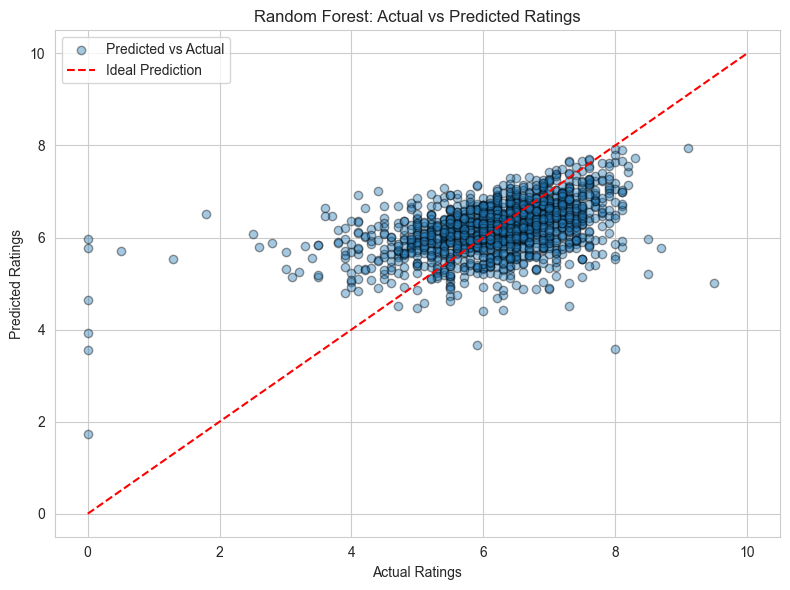

In [197]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, edgecolor='k', label='Predicted vs Actual')
plt.plot([0, 10], [0, 10], 'r--', label='Ideal Prediction')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest: Actual vs Predicted Ratings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

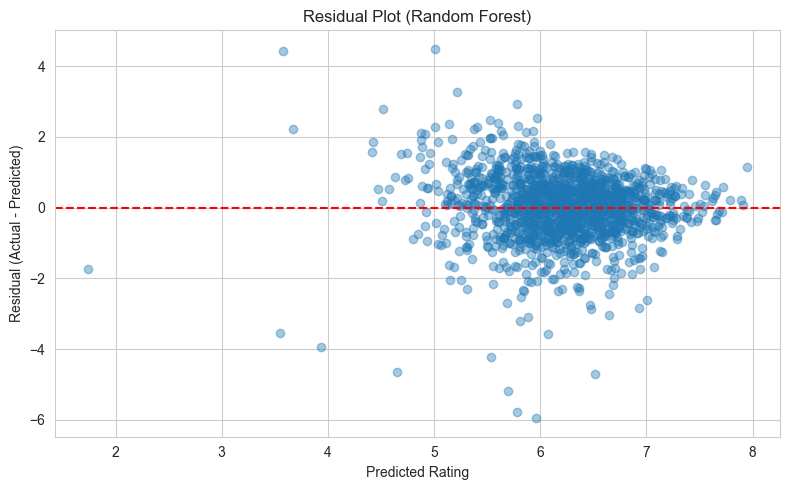

In [198]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_rf, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Rating')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot (Random Forest)')
plt.grid(True)
plt.tight_layout()
plt.show()

The residual plot shows that the model is more confident in predicting average ratings (~5.5 to 6.5), and less accurate on extreme ratings (very high or low), most likely because there is more data for those middle ratings and the features have a low predictive power. This is consistent with the modest R² score and indicates the model could benefit from additional features to capture more of the variance in the data.

### Conclusion With Random Forest
##### To explore whether a more flexible model could better capture the relationship between movie attributes and average ratings, we trained a Random Forest Regressor using the same features: budget, popularity, revenue, and runtime. The model achieved an R² score of 0.206, meaning it explained approximately 20.6% of the variance in movie ratings — nearly double that of the linear regression model. Additionally, it produced a lower RMSE of 0.937, indicating more accurate predictions on average. These results suggest that while the selected features still only moderately explain movie ratings, the Random Forest model was better able to capture nonlinear relationships and feature interactions that a linear model could not. This supports the idea that more complex models can offer predictive gains, even when working with limited or weakly correlated inputs.

## Further Contextualization with Additional Categorical Data to Improve Predictive Power ~ Random Forest Regression

#### In order to make this prediction better, we added some other features that can potentially bring more predictive power for raiting, such as genre and cast. To do this, we had to implement some multi-hot encoding vectorization techniques so that the categorical data in genres and cast and could be represented numerically.

In [199]:
print(feature_df.columns)
credits_df = pd.read_csv("moviesdata/credits.csv")

Index(['id', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average'], dtype='object')


In [200]:
print(credits_df["id"].dtype)
print(movies_df["id"].dtype)
print(movies_df['genres'].dtype)
print(credits_df["cast"].dtype)
movies_subset = movies_df[['id', 'genres']]
credits_subset = credits_df[['id', 'cast']]
feature_df = feature_df.merge(movies_subset, on='id', how='left')
feature_df = feature_df.merge(credits_subset, on='id', how='left')
feature_df = feature_df.dropna(subset=['genres', 'cast'])

int64
int64
object
object


In [201]:
print(feature_df.columns)
print(feature_df.isnull().sum())
print(feature_df.shape)

Index(['id', 'budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'genres', 'cast'],
      dtype='object')
id              0
budget          0
popularity      0
revenue         0
runtime         0
vote_average    0
genres          0
cast            0
dtype: int64
(7462, 8)


In [202]:
import ast
from sklearn.preprocessing import MultiLabelBinarizer
from collections import Counter

#parse genres and casts into lists
def parse_genres(genre_list):
    try:
        return [entry['name'] for entry in genre_list if 'name' in entry]
    except:
        return []
def parse_cast(cast_str):
    try:
        return [entry['name'] for entry in ast.literal_eval(cast_str)]
    except:
        return []
feature_df['parsed_genres'] = feature_df['genres'].apply(parse_genres)
feature_df['parsed_cast'] = feature_df['cast'].apply(parse_cast)

In [204]:
print(feature_df['parsed_genres'])

0            [Animation, Comedy, Family]
1           [Adventure, Fantasy, Family]
2               [Comedy, Drama, Romance]
3                               [Comedy]
4       [Action, Crime, Drama, Thriller]
                      ...               
7457                     [Crime, Comedy]
7458           [Drama, History, Mystery]
7459                     [Comedy, Drama]
7460                    [Romance, Drama]
7461    [Action, Comedy, Crime, Foreign]
Name: parsed_genres, Length: 7462, dtype: object


In [205]:
print(feature_df['parsed_cast'])

0       [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1       [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2       [Whitney Houston, Angela Bassett, Loretta Devi...
3       [Steve Martin, Diane Keaton, Martin Short, Kim...
4       [Al Pacino, Robert De Niro, Val Kilmer, Jon Vo...
                              ...                        
7457    [Andrey Muravyov, Yuliya Khlynina, Anton Shurt...
7458    [Sergei Makovetsky, Konstantin Khabenskiy, Мар...
7459    [Marat Basharov, Yuriy Kutsenko, Vladislav Gal...
7460    [Fyodor Bondarchuk, Oksana Fandera, Juozas Bud...
7461    [Vladimir Turchinsky, Dmitriy Dyuzhev, Tatyana...
Name: parsed_cast, Length: 7462, dtype: object


In [206]:
#multi-hot encoding for genres
mlb_genres = MultiLabelBinarizer()
genre_features = pd.DataFrame(mlb_genres.fit_transform(feature_df['parsed_genres']),
                              columns=['genre_' + g for g in mlb_genres.classes_],
                              index=feature_df.index)

In [207]:
#multi-hot encoding + top n actors for cast
n = 20
all_cast = [actor for sublist in feature_df['parsed_cast'] for actor in sublist]
top_actors = set([actor for actor, _ in Counter(all_cast).most_common(n)])

def filter_top_cast(cast_list):
    return [actor for actor in cast_list if actor in top_actors]
feature_df['filtered_cast'] = feature_df['parsed_cast'].apply(filter_top_cast)

mlb_cast = MultiLabelBinarizer()
cast_features = pd.DataFrame(mlb_cast.fit_transform(feature_df['filtered_cast']),
                             columns=['actor_' + a for a in mlb_cast.classes_],
                             index=feature_df.index)

In [208]:
#add total actor count as a feature for possible predictive power weight
feature_df['actor_count'] = feature_df['parsed_cast'].apply(len)

In [210]:
final_df = pd.concat([
    feature_df[['budget', 'popularity', 'revenue', 'runtime', 'vote_average', 'actor_count']],
    genre_features,
    cast_features
], axis=1)

print(final_df.shape)
print(final_df.columns)
print(final_df.head)

(7462, 46)
Index(['budget', 'popularity', 'revenue', 'runtime', 'vote_average',
       'actor_count', 'genre_Action', 'genre_Adventure', 'genre_Animation',
       'genre_Comedy', 'genre_Crime', 'genre_Documentary', 'genre_Drama',
       'genre_Family', 'genre_Fantasy', 'genre_Foreign', 'genre_History',
       'genre_Horror', 'genre_Music', 'genre_Mystery', 'genre_Romance',
       'genre_Science Fiction', 'genre_TV Movie', 'genre_Thriller',
       'genre_War', 'genre_Western', 'actor_Brad Pitt', 'actor_Bruce Willis',
       'actor_Christopher Walken', 'actor_J.K. Simmons', 'actor_John Goodman',
       'actor_Johnny Depp', 'actor_Julianne Moore', 'actor_Liam Neeson',
       'actor_Matt Damon', 'actor_Morgan Freeman', 'actor_Nicolas Cage',
       'actor_Paul Giamatti', 'actor_Richard Jenkins', 'actor_Robert De Niro',
       'actor_Robin Williams', 'actor_Samuel L. Jackson',
       'actor_Stanley Tucci', 'actor_Steve Buscemi',
       'actor_Sylvester Stallone', 'actor_Willem Dafoe'],
     

In [211]:
#define features and target
X = final_df.drop(columns=['vote_average'])
y = final_df['vote_average']

#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#train the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#make predictions
y_pred_rf = rf_model.predict(X_test)

#evaluate
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = root_mean_squared_error(y_test, y_pred_rf)

print(f"🌲 Random Forest R² Score: {r2_rf:.4f}")
print(f"🌲 Random Forest RMSE: {rmse_rf:.4f}")

🌲 Random Forest R² Score: 0.3259
🌲 Random Forest RMSE: 0.8484


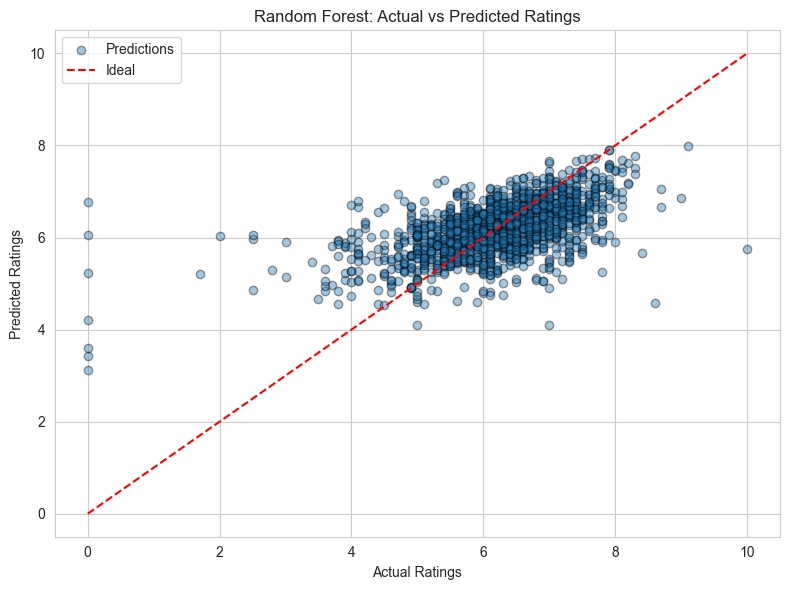

In [212]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, edgecolor='k', label='Predictions')
plt.plot([0, 10], [0, 10], color='red', linestyle='--', label='Ideal')
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Random Forest: Actual vs Predicted Ratings')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

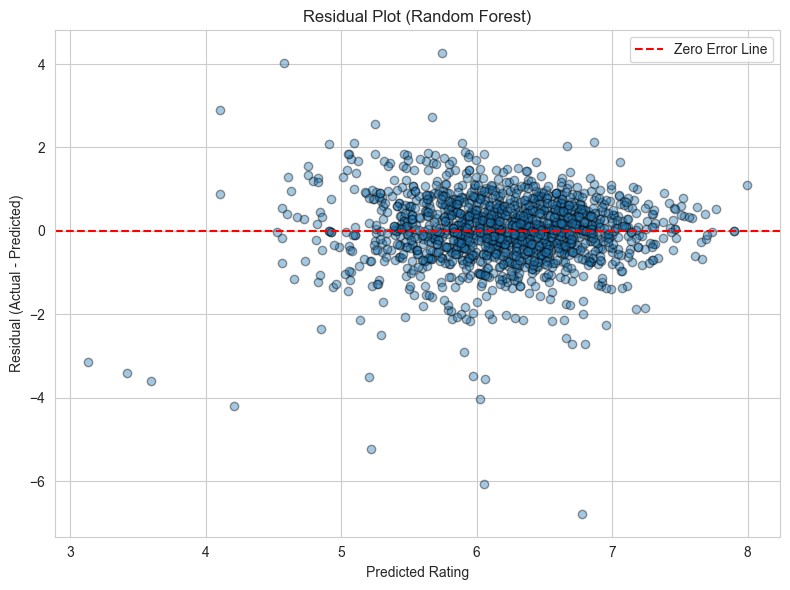

In [214]:
residuals = y_test - y_pred_rf
plt.figure(figsize=(8, 6))
plt.scatter(y_pred_rf, residuals, alpha=0.4, edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')
plt.xlabel('Predicted Rating')
plt.ylabel('Residual (Actual - Predicted)')
plt.title('Residual Plot (Random Forest)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Conclusion for Enhanced Feature Random Forest
##### After enhancing the feature set with multi-hot encoded genres, multi-hot encoded top actors, and total actor count, the performance of the Random Forest Regressor improved noticeably. The updated model achieved an R² score of 0.3259, a significant increase from the previous score of 0.2058 when only numeric features like budget, popularity, revenue, and runtime were used. Similarly, the RMSE decreased from 0.9369 to 0.8484, indicating improved prediction accuracy. These results suggest that categorical information—especially the inclusion of genre tags and prominent actors—contributed valuable signal that the model could learn from. While the gains aren't massive, they demonstrate that movie content and cast characteristics add predictive power beyond numeric metadata alone. This reinforces the idea that for complex, human-centered outcomes like movie ratings, contextual features can meaningfully enhance model performance.

# Insights and Conclusions
#### This project reveals the complexity of predicting movie ratings and challenges assumptions about which features are most influential. While early hypothesis tests suggested that individual numerical features such as budget, runtime, and popularity had limited predictive power, incorporating a richer feature set—specifically multi-hot encoded genres, the presence of top actors, and total cast size—led to a measurable improvement in model performance. The enhanced Random Forest model achieved a higher R² score (0.3259 vs. 0.2058 previously) and a lower RMSE, demonstrating that categorical information holds valuable, nonlinear insights that linear models might overlook. 

#### For readers unfamiliar with data science, this project offers a concrete example of how feature engineering and model selection impact predictive accuracy. For those already experienced with machine learning, the analysis emphasizes the trade-offs between interpretability and complexity, and how even seemingly weak features can contribute meaningfully when combined. Ultimately, the findings show that understanding audience reception requires a holistic approach—no single factor explains ratings, but together, structured and unstructured data can reveal significant patterns.